Importing Libraries

In [3]:
# Importing necessary libraries for the data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load your dataset
df1 = pd.read_csv('/content/dailyActivity_merged.csv')
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Cleaning and Preprocessing

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df1.isnull().sum())


Missing Values:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [6]:
# Remove duplicates
df1 = df1.drop_duplicates()

In [7]:
# Correct data types
df1['ActivityDate'] = pd.to_datetime(df1['ActivityDate'])

In [8]:
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## Visualisation

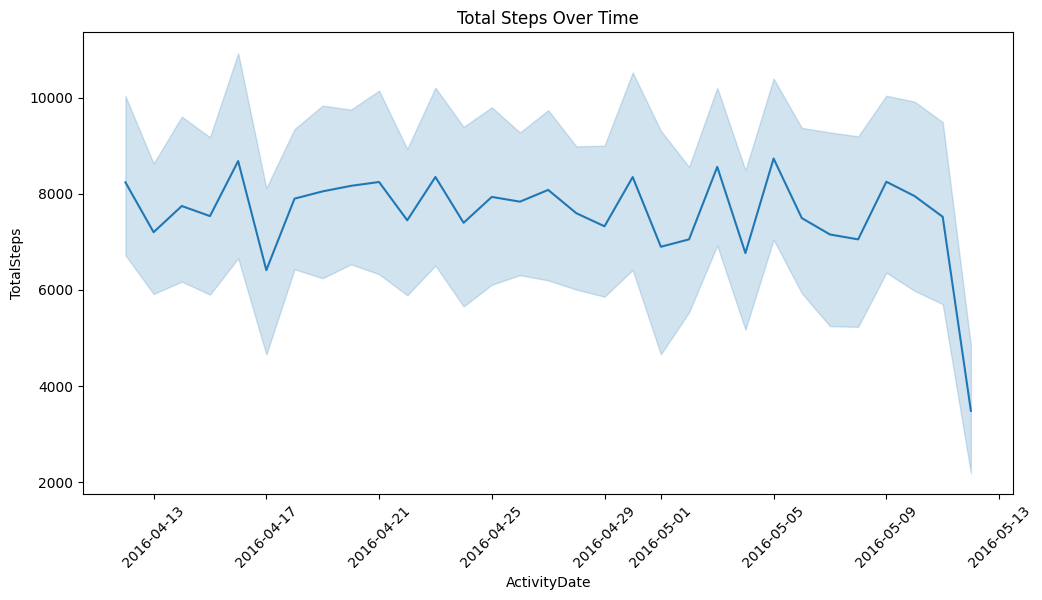

In [9]:
# Line Plot - Total Steps Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='ActivityDate', y='TotalSteps', data=df1)
plt.title('Total Steps Over Time')
plt.xticks(rotation=45)
plt.show()

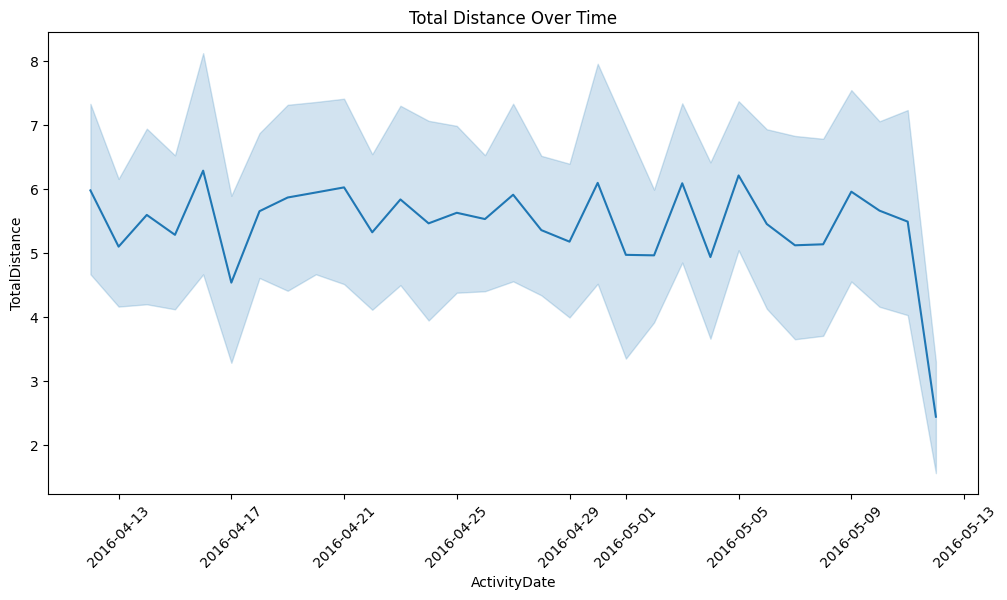

In [10]:
# Line Plot-Total Distance Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='ActivityDate', y='TotalDistance', data=df1)
plt.title('Total Distance Over Time')
plt.xticks(rotation=45)
plt.show()

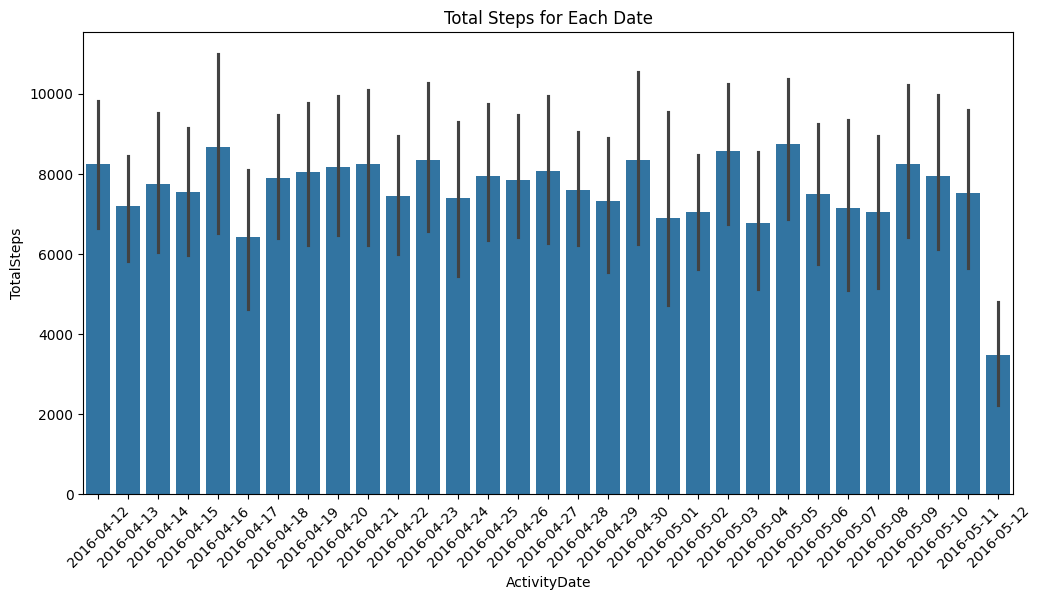

In [11]:
# Bar Plot-Total Steps for Each Date
plt.figure(figsize=(12, 6))
sns.barplot(x='ActivityDate', y='TotalSteps', data=df1)
plt.title('Total Steps for Each Date')
plt.xticks(rotation=45)
plt.show()

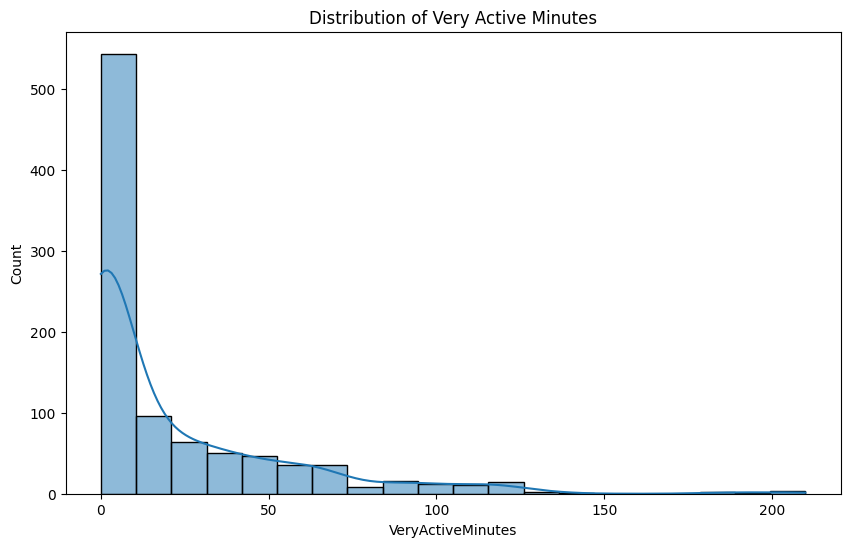

In [12]:
# Histogram-Distribution of Very Active Minutes
plt.figure(figsize=(10, 6))
sns.histplot(df1['VeryActiveMinutes'], bins=20, kde=True)
plt.title('Distribution of Very Active Minutes')
plt.show()

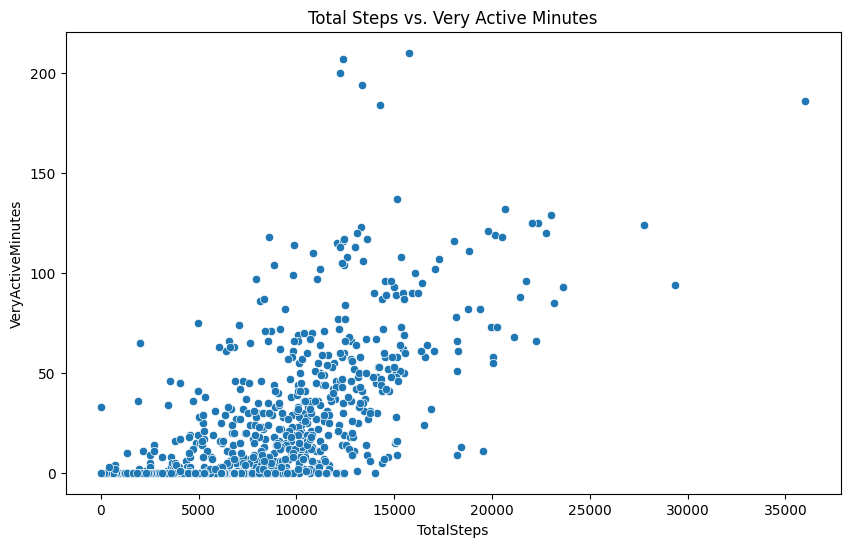

In [13]:
# Scatter Plot-Total Steps vs. Very Active Minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='VeryActiveMinutes', data=df1)
plt.title('Total Steps vs. Very Active Minutes')
plt.show()

<ipython-input-14-4cb6c7f8a2e3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')


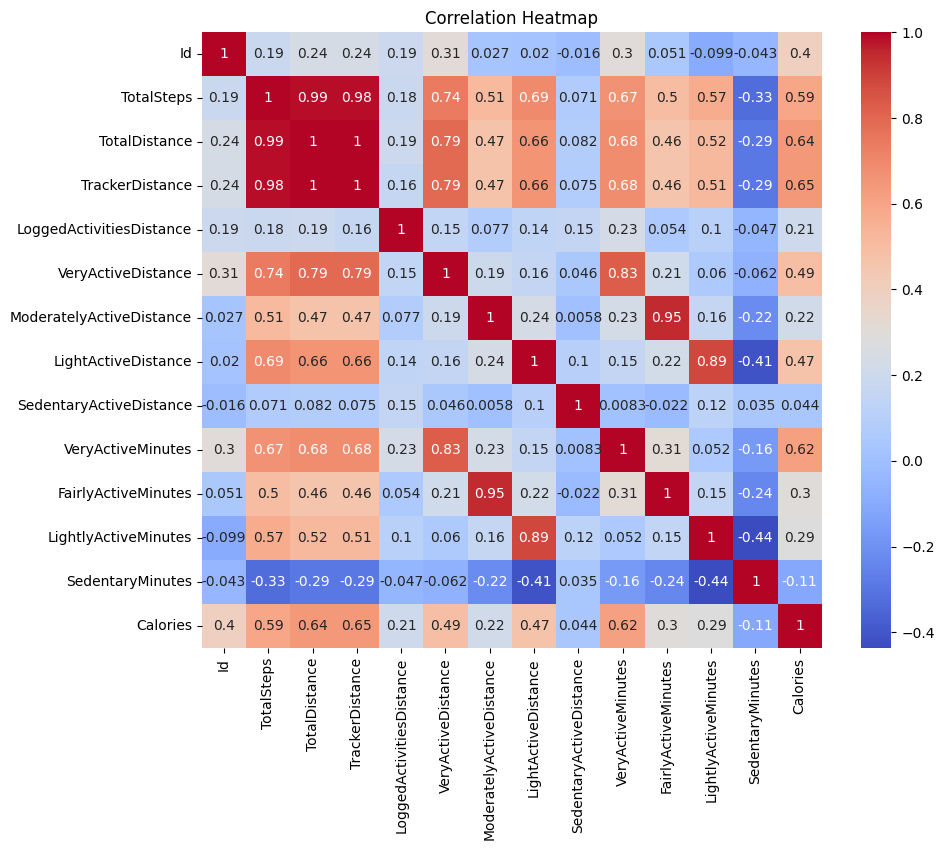

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

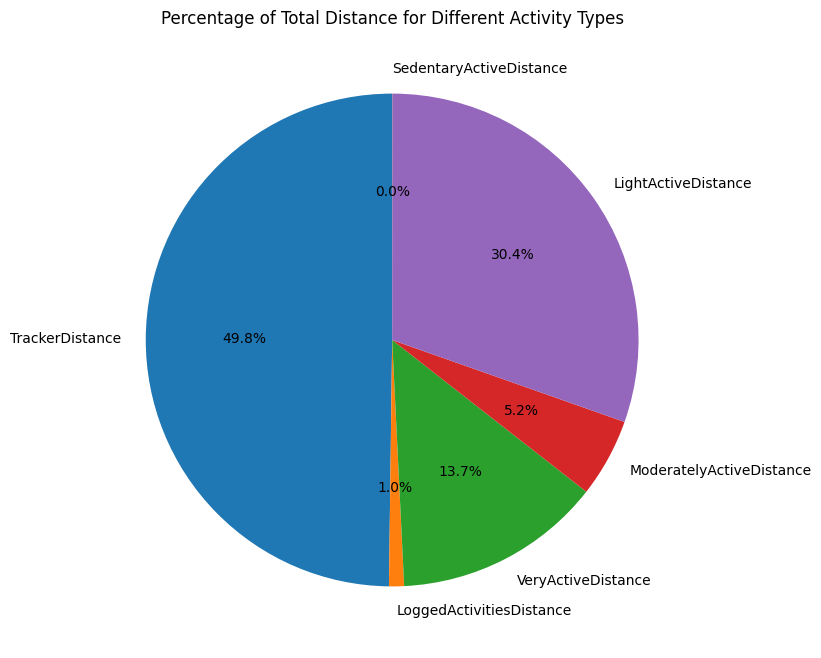

In [15]:
# Pie Chart-Percentage of Total Distance for Different Activity Types
activity_types = ['TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
                  'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']
total_distance_per_activity = df1[activity_types].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_distance_per_activity, labels=activity_types, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Distance for Different Activity Types')
plt.show()

**Merging all the datasets to analyse on hourly basis**



In [17]:
# Load your dataset
df2 = pd.read_csv('/content/hourlyCalories_merged.csv')
df2.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [18]:
# Load your dataset
df3 = pd.read_csv('/content/hourlyIntensities_merged.csv')
df3.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [19]:
# Load your dataset
df4 = pd.read_csv('/content/hourlySteps_merged.csv')
df4.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [20]:
# Lets merge df2 and df3 and df4
merged_df = pd.merge(df2, df3, on=['Id', 'ActivityHour'], how='outer')
merged_df = pd.merge(merged_df, df4, on=['Id', 'ActivityHour'], how='outer')

# Display the merged dataframe
merged_df.head()



,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0


In [21]:
# Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
Id                  0
ActivityHour        0
Calories            0
TotalIntensity      0
AverageIntensity    0
StepTotal           0
dtype: int64


In [22]:
# Remove duplicates
merged_df = merged_df.drop_duplicates()

Now lets make the EDA plots on merged_df (Hourly Basis) merged dataset



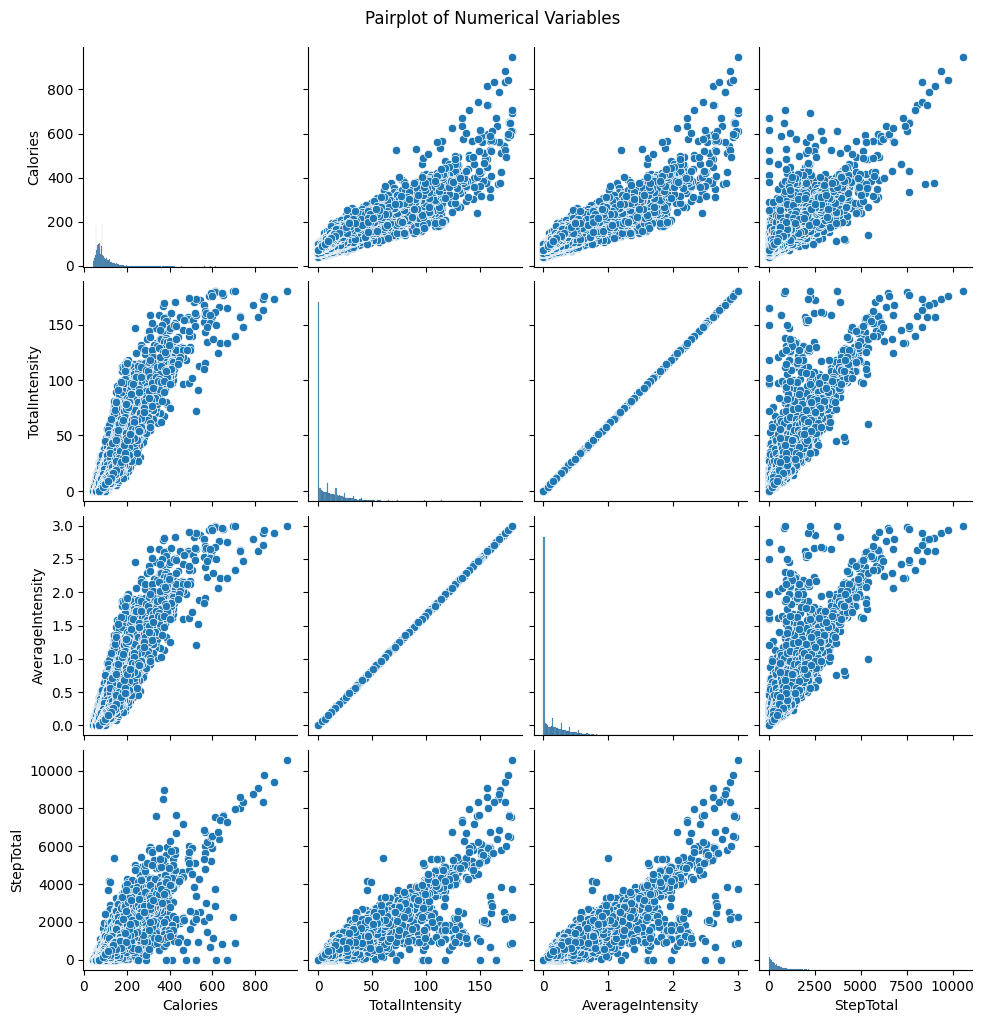

In [23]:
# Pairplot
sns.pairplot(merged_df[['Calories', 'TotalIntensity', 'AverageIntensity', 'StepTotal']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

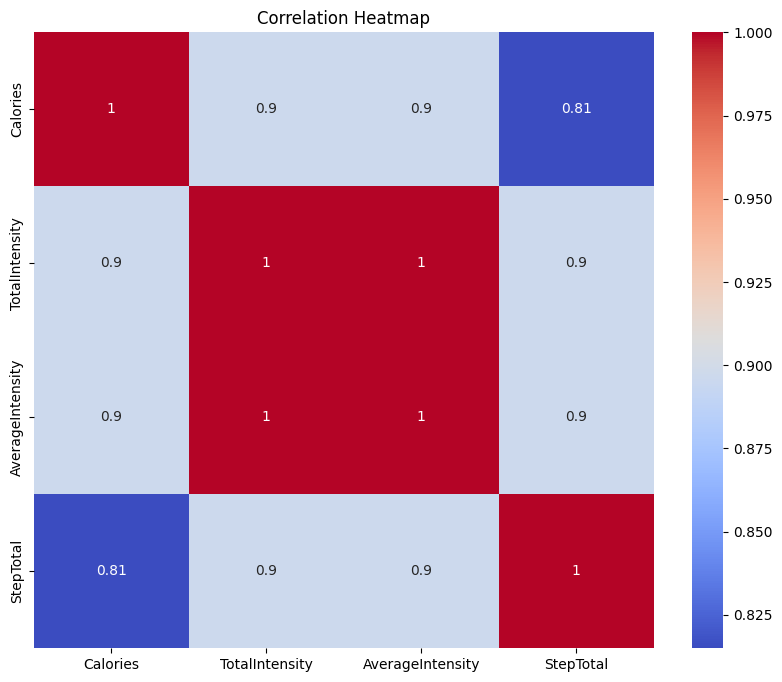

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[['Calories', 'TotalIntensity', 'AverageIntensity', 'StepTotal']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

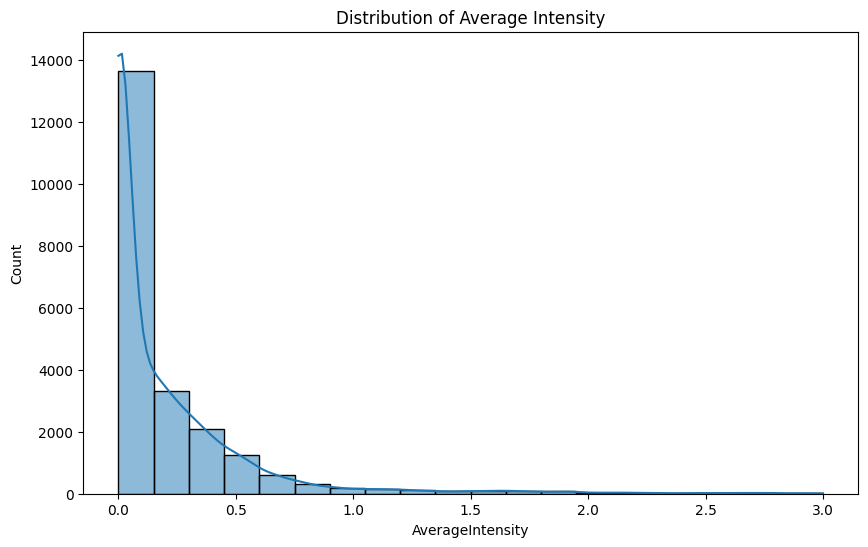

In [25]:
# Create a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['AverageIntensity'], bins=20, kde=True)
plt.title('Distribution of Average Intensity')
plt.show()

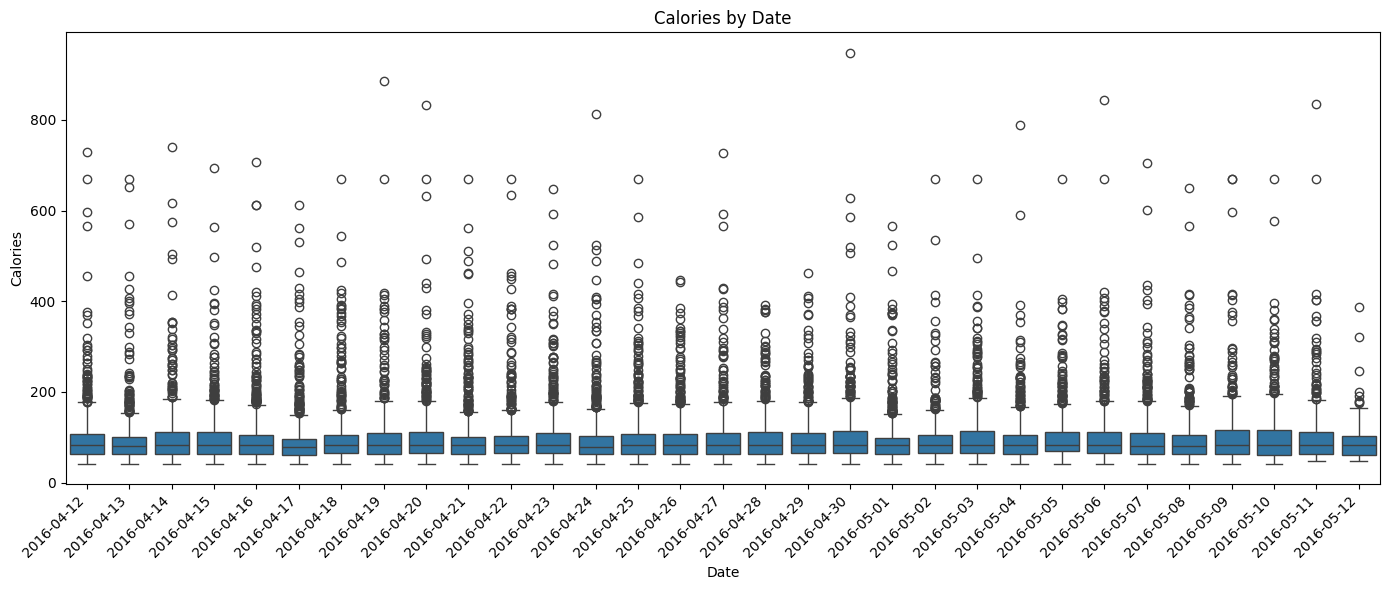

In [29]:
# Assuming 'ActivityHour' is in datetime format
merged_df['ActivityHour'] = pd.to_datetime(merged_df['ActivityHour'])

# Extracting date from 'ActivityHour'
merged_df['Date'] = merged_df['ActivityHour'].dt.date

# Box Plot - Calories by Date
plt.figure(figsize=(14, 6))
sns.boxplot(x='Date', y='Calories', data=merged_df)
plt.title('Calories by Date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Now to analyze the sleep data**

In [30]:
# Load your dataset
df5 = pd.read_csv('/content/sleepDay_merged.csv')
df5.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [31]:
# Check for missing values
print("\nMissing Values:")
print(df5.isnull().sum())


Missing Values:
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [32]:
# Remove duplicates
df5 = df5.drop_duplicates()

**EDA Plots for the sleep data**

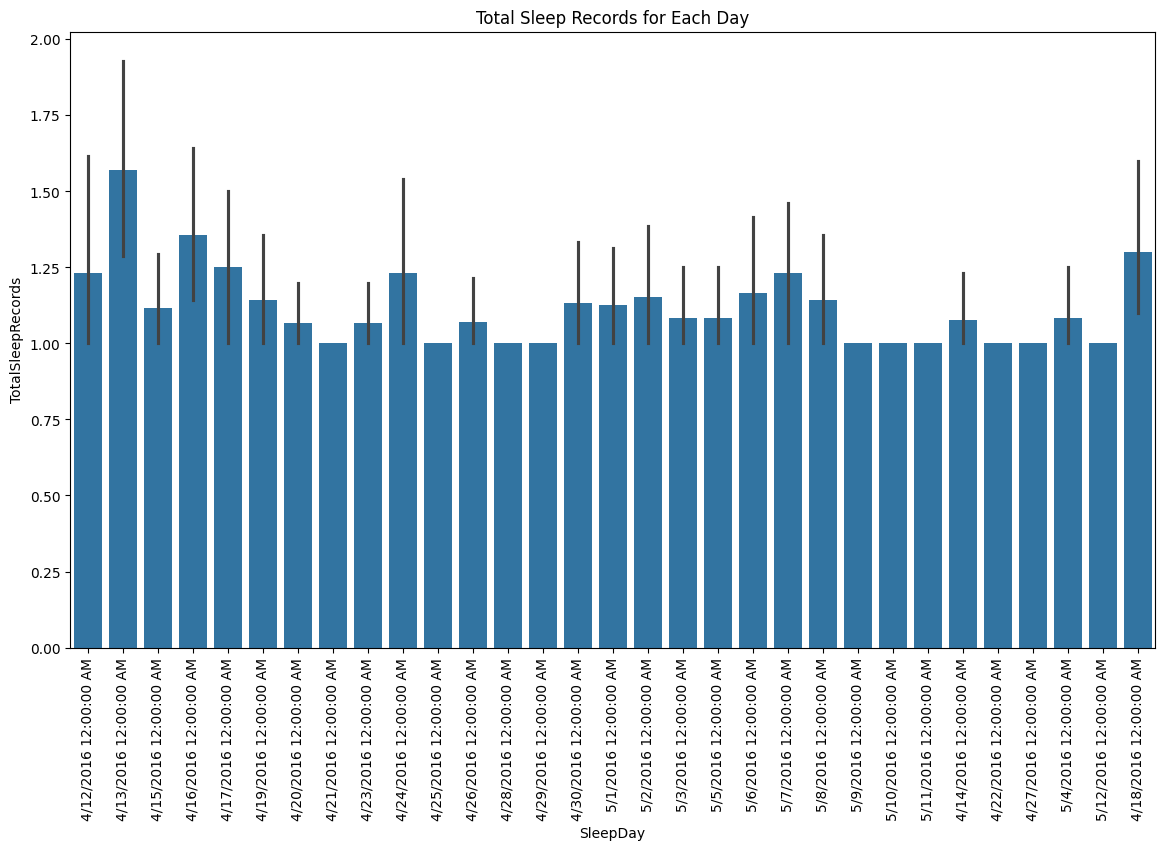

In [36]:
# Bar Plot-Total Sleep Records for Each Day
plt.figure(figsize=(14, 8))
sns.barplot(x='SleepDay', y='TotalSleepRecords', data=df5)
plt.title('Total Sleep Records for Each Day')
plt.xticks(rotation=90)
plt.show()

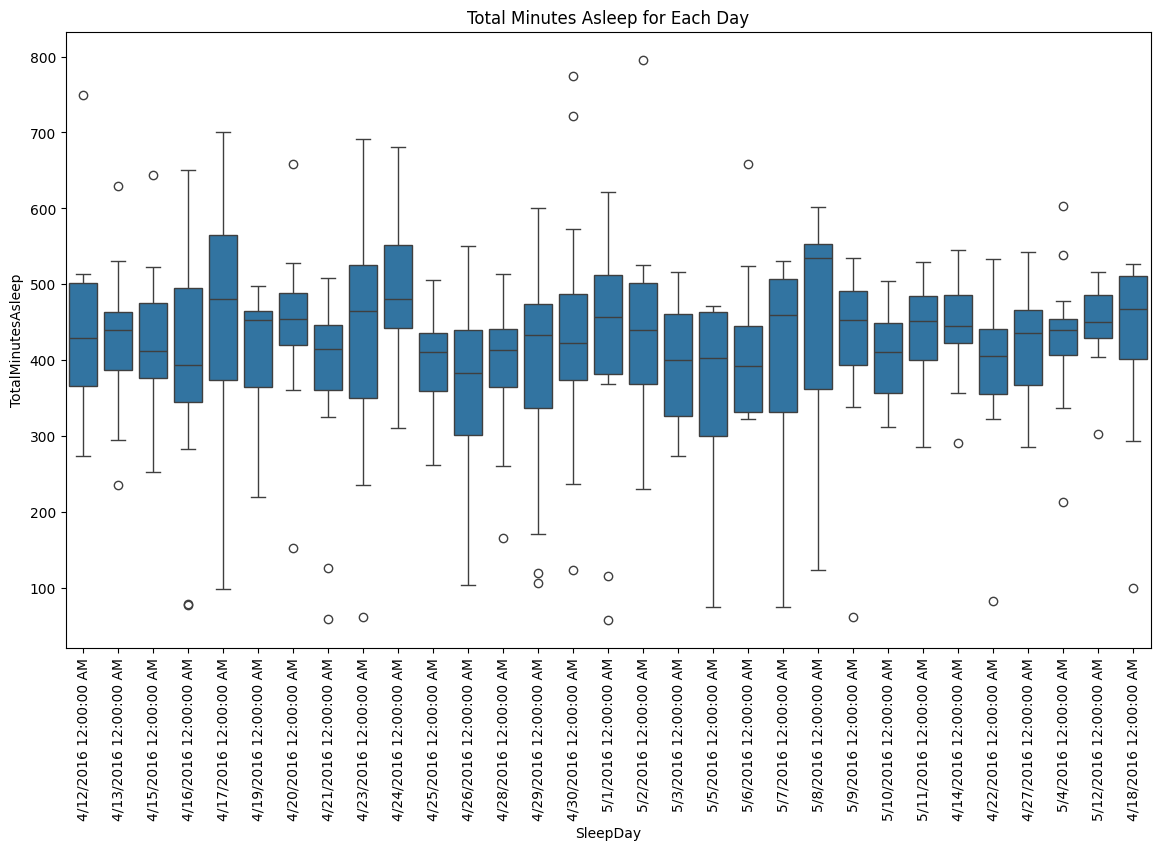

In [38]:
# Box Plot-Total Minutes Asleep for Each Day
plt.figure(figsize=(14, 8))
sns.boxplot(x='SleepDay', y='TotalMinutesAsleep', data=df5)
plt.title('Total Minutes Asleep for Each Day')
plt.xticks(rotation=90)
plt.show()

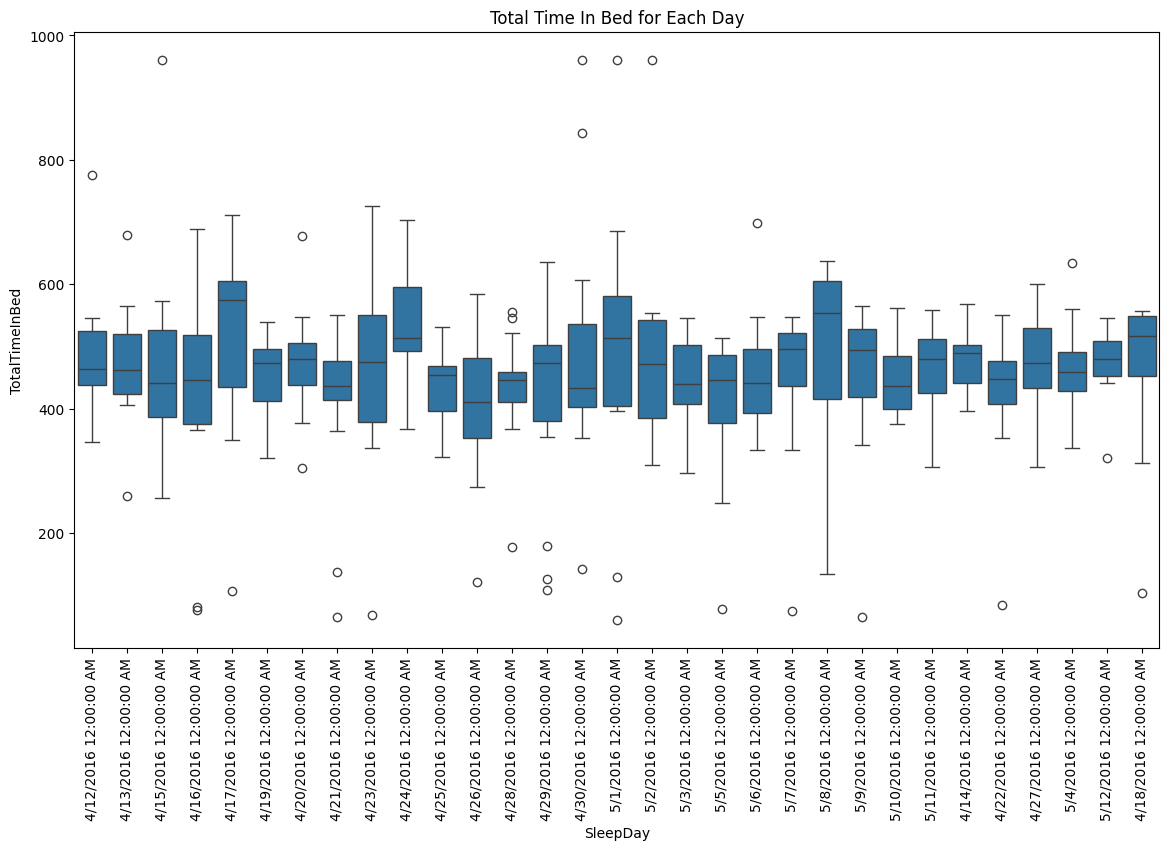

In [39]:
# Box Plot-Total Time In Bed for Each Day
plt.figure(figsize=(14, 8))
sns.boxplot(x='SleepDay', y='TotalTimeInBed', data=df5)
plt.title('Total Time In Bed for Each Day')
plt.xticks(rotation=90)
plt.show()

**Analyzing the weight log**

In [40]:
# Load your dataset
df6 = pd.read_csv('/content/weightLogInfo_merged.csv')
df6.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [41]:
# Check for missing values
print("\nMissing Values:")
print(df6.isnull().sum())


Missing Values:
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64


In [42]:
mean_fat = df6['Fat'].mean()
df6['Fat'].fillna(mean_fat, inplace=True)


In [43]:
# Remove duplicates
df6 = df6.drop_duplicates()
df6.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,23.5,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,23.5,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,23.5,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,23.5,21.690001,True,1463097599000


:**EDA plots for weightloginfo**

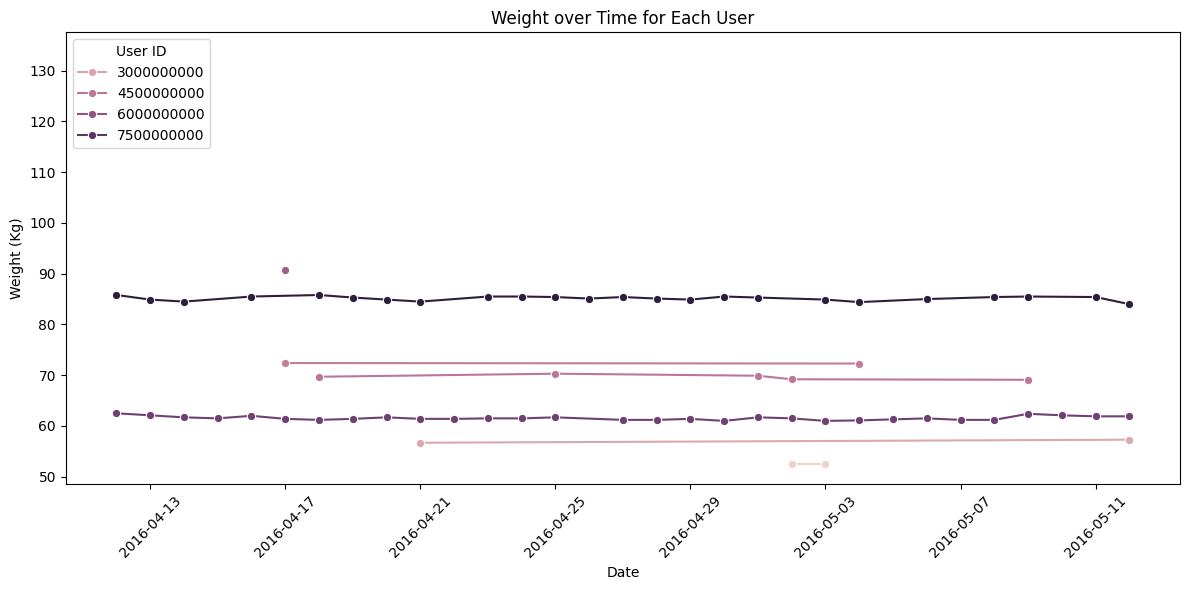

In [45]:
df6['Date'] = pd.to_datetime(df6['Date'])

# Extracting only the date part
df6['Date'] = df6['Date'].dt.date

# Line Plot - Weight over Time for Each User
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='WeightKg', hue='Id', data=df6, marker='o')

plt.title('Weight over Time for Each User')
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')

# Formatting date ticks to show every Nth tick
plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_locator(plt.MaxNLocator(prune='both', integer=True))

plt.legend(title='User ID', loc='upper left')
plt.tight_layout()

plt.show()

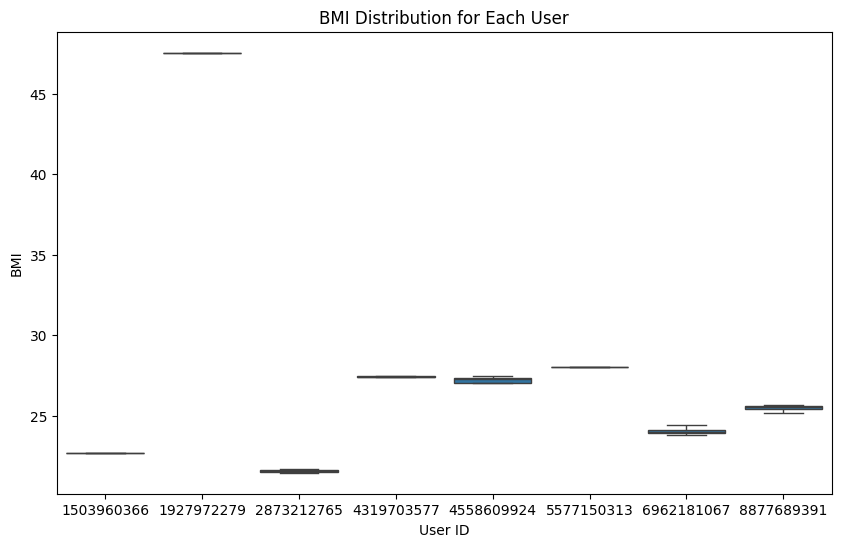

In [46]:
# Box Plot-BMI Distribution for Each User
plt.figure(figsize=(10, 6))
sns.boxplot(x='Id', y='BMI', data=df6)
plt.title('BMI Distribution for Each User')
plt.xlabel('User ID')
plt.ylabel('BMI')
plt.show()

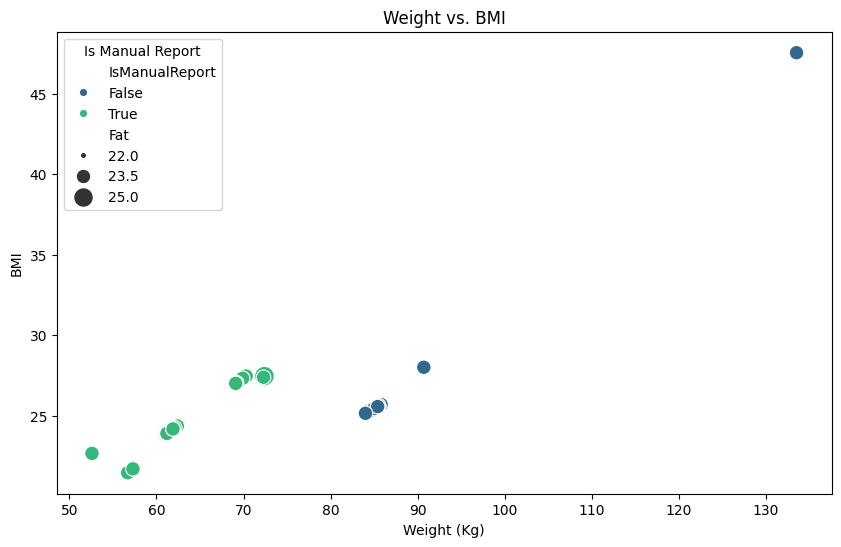

In [47]:
# Scatter Plot - Weight vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WeightKg', y='BMI', data=df6, hue='IsManualReport', palette='viridis', size='Fat', sizes=(20, 200))
plt.title('Weight vs. BMI')
plt.xlabel('Weight (Kg)')
plt.ylabel('BMI')
plt.legend(title='Is Manual Report')
plt.show()

**Analyzing the heart rate**

In [51]:
# Load your dataset
df7 = pd.read_csv('/content/heartrate_seconds_merged.csv')
df7.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97.0
1,2022484408,4/12/2016 7:21:05 AM,102.0
2,2022484408,4/12/2016 7:21:10 AM,105.0
3,2022484408,4/12/2016 7:21:20 AM,103.0
4,2022484408,4/12/2016 7:21:25 AM,101.0


In [52]:
# Check for missing values
print("\nMissing Values:")
print(df7.isnull().sum())


Missing Values:
Id       0
Time     1
Value    1
dtype: int64


**Let's ignore as there is only 1 null value**

In [53]:
# Remove duplicates
df7 = df6.drop_duplicates()
df7.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03,52.599998,115.963147,23.5,22.650000,True,1462319999000
2,1927972279,2016-04-13,133.500000,294.317120,23.5,47.540001,False,1460509732000
3,2873212765,2016-04-21,56.700001,125.002104,23.5,21.450001,True,1461283199000
4,2873212765,2016-05-12,57.299999,126.324875,23.5,21.690001,True,1463097599000


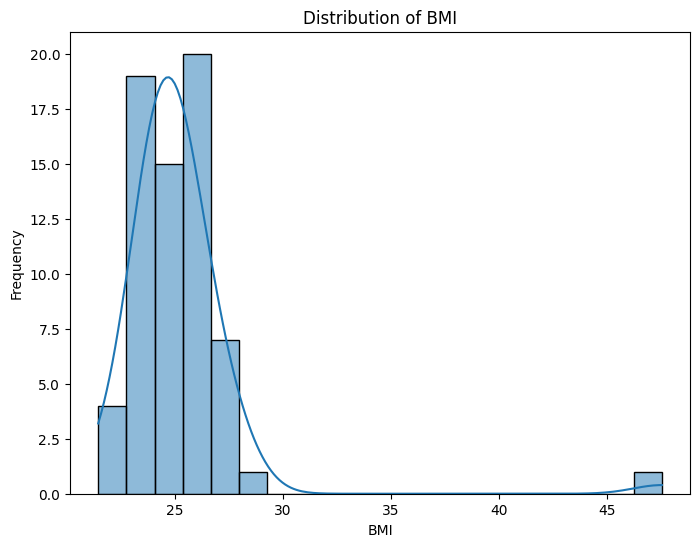

In [54]:
# Histogram-Distribution of BMI
plt.figure(figsize=(8, 6))
sns.histplot(df7['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

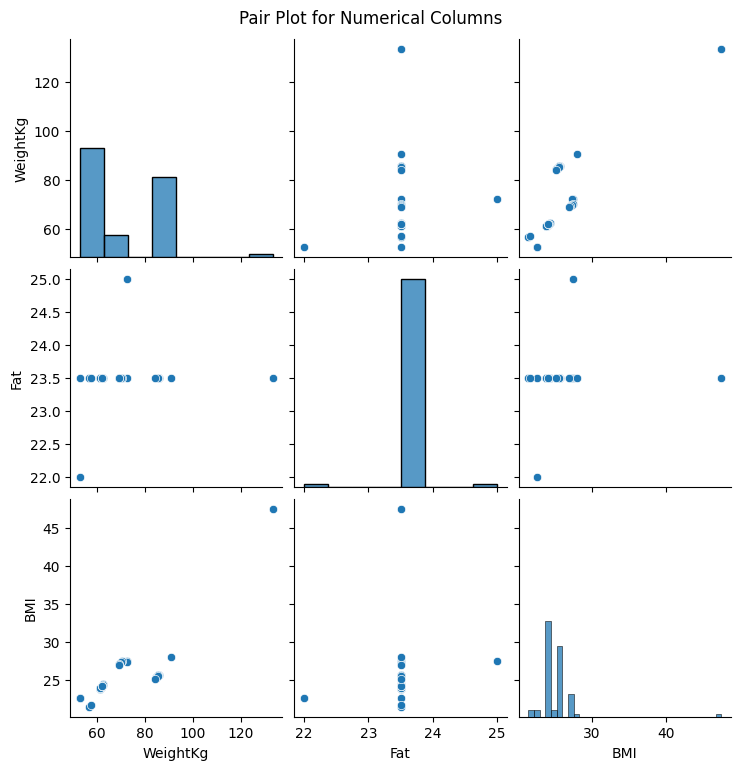

In [55]:
# Pair Plot-Scatterplot matrix for selected numerical columns
numerical_columns = ['WeightKg', 'Fat', 'BMI']
sns.pairplot(df7[numerical_columns])
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()

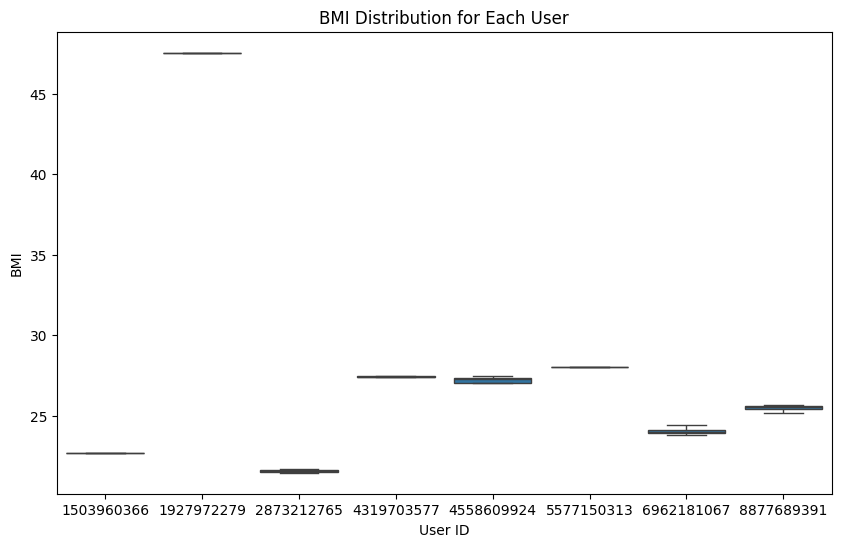

In [56]:
# Box Plot-BMI Distribution for Each User
plt.figure(figsize=(10, 6))
sns.boxplot(x='Id', y='BMI', data=df7)
plt.title('BMI Distribution for Each User')
plt.xlabel('User ID')
plt.ylabel('BMI')
plt.show()

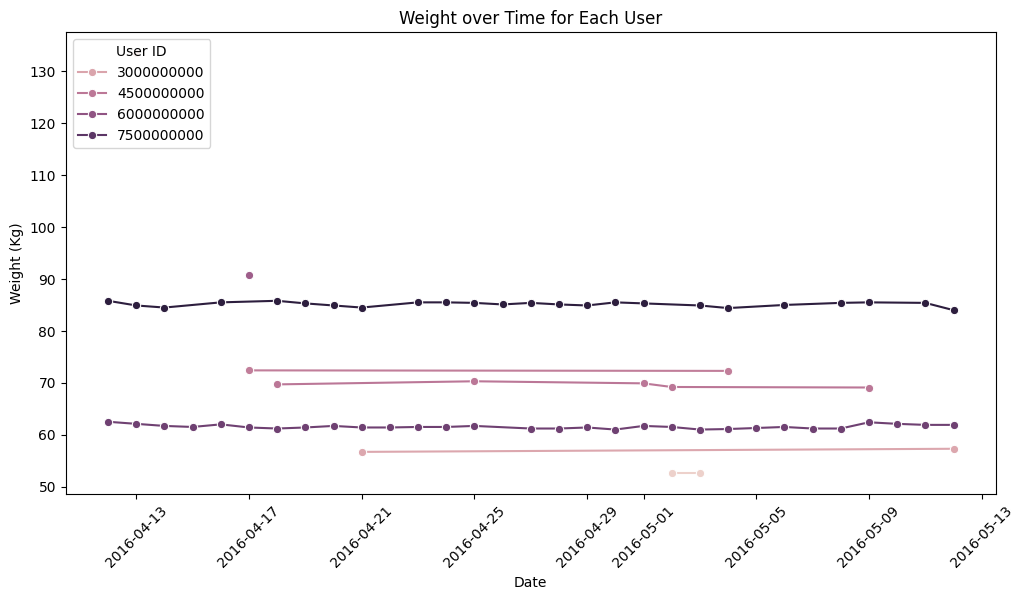

In [57]:
# Line Plot-Weight over Time for Each User
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='WeightKg', hue='Id', data=df7, marker='o')
plt.title('Weight over Time for Each User')
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.xticks(rotation=45)
plt.legend(title='User ID', loc='upper left')
plt.show()